In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Thesis/RF_DATASET/WELFAKE/WELFake_Dataset.csv")

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
data.columns

Index(['title', 'text', 'label'], dtype='object')

In [8]:
data = data.dropna()

In [9]:
print(data['label'].value_counts())

label
1    36509
0    35028
Name: count, dtype: int64


Countplot of articles, distributed between fake and real classes

<ipython-input-12-8fde6d55bff5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=palette)


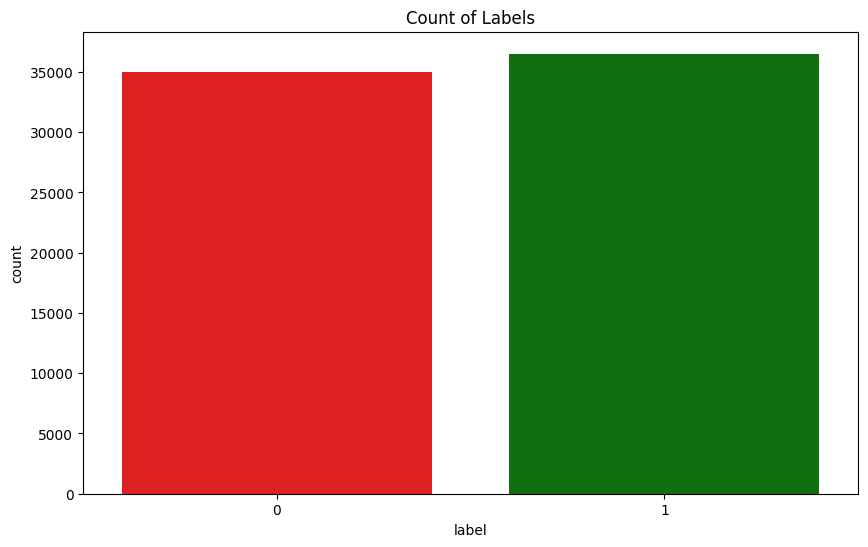

label
1    36509
0    35028
Name: count, dtype: int64

In [12]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent results
np.random.seed(2023)

# Plotting the count of labels
plt.figure(figsize=(10, 6))
palette = {"1": "green", "0": "red"}
sns.countplot(x='label', data=data, palette=palette)
plt.title('Count of Labels')
plt.show()

# Retrieve count data and format it
count_data = data['label'].value_counts().to_dict()
count_data_json = {'Fake': round(count_data[0]), 'Real': round(count_data[1])}
plot_data = data['label'].value_counts().to_dict()
json_file_path = 'count_plot_data_PA.json'

# Save to JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(count_data_json, json_file)


data['label'].value_counts()

In [10]:
print(data['text'].str.len().mean())

3292.7221158281727


In [13]:
import string
def clean_text_data(text):
  # turn all the data into strings with lovercase just in case
  text = str(text)
  text = text.lower()
  to_remove = r'https?://\S+|www\.\S+|<.*?>|\d+|\W+'
  text = re.sub(to_remove, ' ', text)
  return text.strip()

# combine title and text and clean each text insatnce
data['title_and_text'] = data['title'] + ' ' + data['text']
data['title_and_text'] = data['text'].apply(clean_text_data)

### **Show how articles are distributed with length over each class. This will aid in choosing how long the user input should be.**

<ipython-input-11-efa99bb6171b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Fake News', 'Real News'], y=[mean_lengths_json['Fake'], mean_lengths_json['Real']], palette={'Fake News': 'red', 'Real News': 'green'})


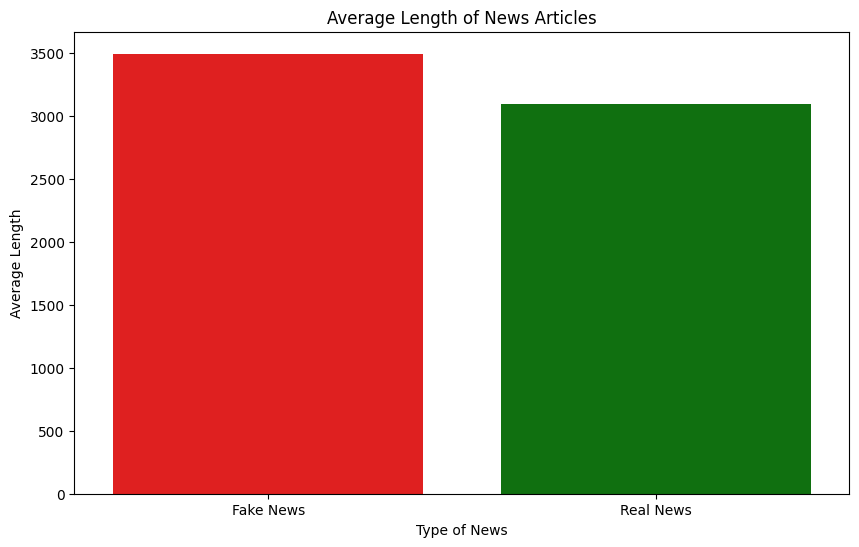

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data['length'] = data['text'].apply(len)

mean_lengths = data.groupby('label')['length'].mean().to_dict()

# Map labels to 'Fake' and 'Real'
mean_lengths_json = {'Fake': round(mean_lengths[0]), 'Real':round( mean_lengths[1])}

# Plotting the average lengths
plt.figure(figsize=(10, 6))
sns.barplot(x=['Fake News', 'Real News'], y=[mean_lengths_json['Fake'], mean_lengths_json['Real']], palette={'Fake News': 'red', 'Real News': 'green'})
plt.title('Average Length of News Articles')
plt.ylabel('Average Length')
plt.xlabel('Type of News')
plt.show()
# Save for web app
with open('mean_lengths_PA.json', 'w') as file:
    json.dump(mean_lengths_json, file)



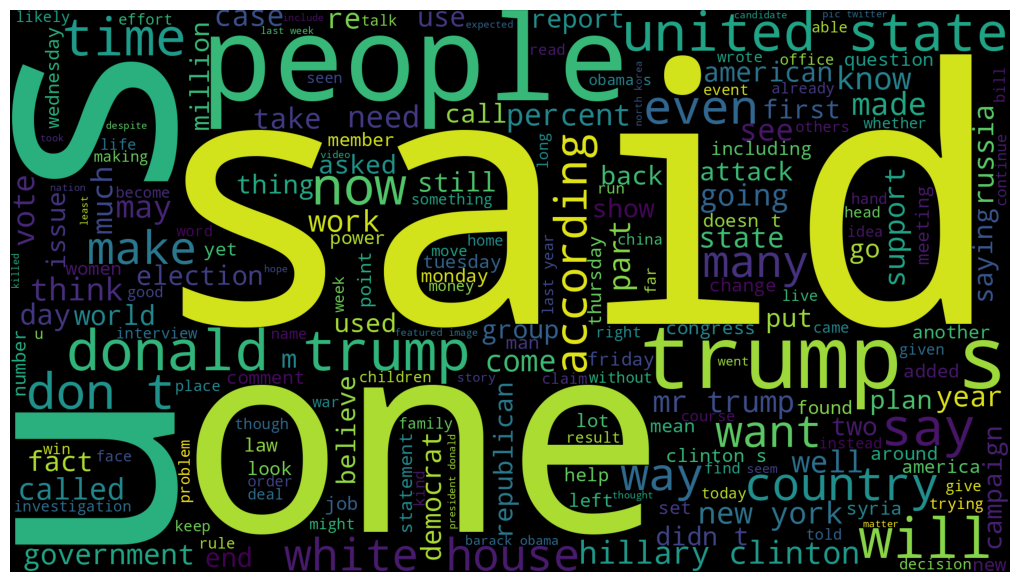

In [14]:
from wordcloud import WordCloud
wcText = ''.join(str(data['title_and_text'].tolist()))
wordcloud = WordCloud(width=1920, height = 1080).generate(wcText)
figure = plt.figure(figsize=(10,10))
plt.imshow(wordcloud) # viusalize wordlcoud
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           71537 non-null  object
 1   text            71537 non-null  object
 2   label           71537 non-null  int64 
 3   length          71537 non-null  int64 
 4   title_and_text  71537 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.3+ MB


In [16]:
print(data['text'][0:100])

0      No comment is expected from Barack Obama Membe...
2       Now, most of the demonstrators gathered last ...
3      A dozen politically active pastors came here f...
4      The RS-28 Sarmat missile, dubbed Satan 2, will...
5      All we can say on this one is it s about time ...
                             ...                        
97     Tune in to the Alternate Current Radio Network...
98     So much for trying to come together like the l...
99     Most of the world will be obsessed with Beyonc...
100    (Reuters) - One person was shot at an anti-Tru...
101    By many measures, Chobani embodies the classic...
Name: text, Length: 100, dtype: object


In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer as wn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split as tts
from nltk.tokenize import word_tokenize




# remove the stopwords
def remove_stopwords_lemmatize(text):
    lemmatizer = wn()
    tokenized = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenized if w not in stop_words])

data['title_and_text'] = data['title_and_text'].apply(remove_stopwords_lemmatize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(data['title_and_text'], data['label'], test_size=0.20)
# Define the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.01) # consider 1, 2 or max 3 words in a sequence
# Fit and transform the training data
X_tfidf_trian = tfidf_vectorizer.fit_transform(X_train)
# Transform the test data
X_tfidf_test = tfidf_vectorizer.transform(X_test)


count_vectorizer = CountVectorizer()

X_count_trian = count_vectorizer.fit_transform(X_train)
X_count_test = count_vectorizer.transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(C=0.5, max_iter=1000, warm_start=True)
model.fit(X_tfidf_trian, y_train)
y_pred = model.predict(X_tfidf_test)
scores = cross_val_score(model, X_tfidf_test, y_test, cv=5, scoring='accuracy')
print("Accuracy Passive:", accuracy_score(y_test, y_pred))
print("Cross-Validation Accuracy Passive:", scores.mean())


"""model2 = PassiveAggressiveClassifier(C=0.5, warm_start=True)
model2.fit(X_count_trian, y_train)
y_pred = model.predict(X_count_test)
scores = cross_val_score(model, X_count_test, y_test, cv=5, scoring='accuracy')
print("Accuracy Passive:", accuracy_score(y_test, y_pred))
print("Cross-Validation Accuracy Passive:", scores.mean())"""


Accuracy Passive: 0.9421302767682416
Cross-Validation Accuracy Passive: 0.9036906849408085


'model2 = PassiveAggressiveClassifier(C=0.5, warm_start=True)\nmodel2.fit(X_count_trian, y_train)\ny_pred = model.predict(X_count_test)\nscores = cross_val_score(model, X_count_test, y_test, cv=5, scoring=\'accuracy\')\nprint("Accuracy Passive:", accuracy_score(y_test, y_pred))\nprint("Cross-Validation Accuracy Passive:", scores.mean())'

In [20]:
import pickle

# Pickle the trained ensemble model
with open('/content/drive/MyDrive/Thesis/Naive_bayes/data/PA_model_new_prec_last.pkl', 'wb') as f:
     pickle.dump(model, f)

# Load the TF-IDF vectorizer
with open('/content/drive/MyDrive/Thesis/Naive_bayes/data/PA_Tfidf_new_prec_last.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [ ]:
def preprocess_text(text):
    text = clean_text_data(text)
    text = remove_stopwords_lemmatize(text)
    return text

# Define a function to preprocess news article and make prediction
def predict_news_article(news_article, vectorizer, model):
    # Preprocess the news article
    preprocessed_article = preprocess_text(news_article)
    # Create a DataFrame with the preprocessed article
    df = pd.DataFrame({'text': [preprocessed_article]})
    # Vectorize the preprocessed text
    xvector_article = vectorizer.transform(df['text'])
    # Predict the label
    prediction = model.predict(xvector_article)
    print(prediction[0])
    if prediction[0] == 0:
      return "Fake news"
    return "Real news"


news_article = ""


predicted_label3 = predict_news_article(news_article, tfidf_vectorizer, model)
print("Predicted label PAC:", predicted_label3)

1
Predicted label PAC: Real news


Confusion Matrix:
 [[6605  434]
 [ 394 6875]]


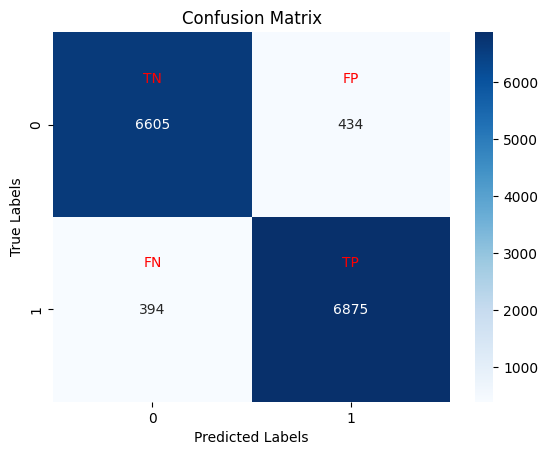

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Annotate each cell with the respective quadrant labels**
labels = ['TN', 'FP', 'FN', 'TP']
label_positions = [(0,0), (0,1), (1,0), (1,1)]
for label, pos in zip(labels, label_positions):
    plt.text(pos[1]+0.5, pos[0]+0.25, label, ha='center', va='center', color='red')

plt.show()